In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CAR DETAILS.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# 1. Check data types
print(df.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [4]:
# 2. Check null values
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [5]:
#3.Check and handle duplicated values

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

763
0


In [6]:
#feature engineering 
df['brand']=df['name'].str.split(expand=True)[0]
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [7]:
#Find numerical and categorical columns
num_cols=df.dtypes[df.dtypes != 'object'].index
cat_cols=df.dtypes[df.dtypes == 'object'].index

print(num_cols)
print(cat_cols)

Index(['year', 'selling_price', 'km_driven'], dtype='object')
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype='object')


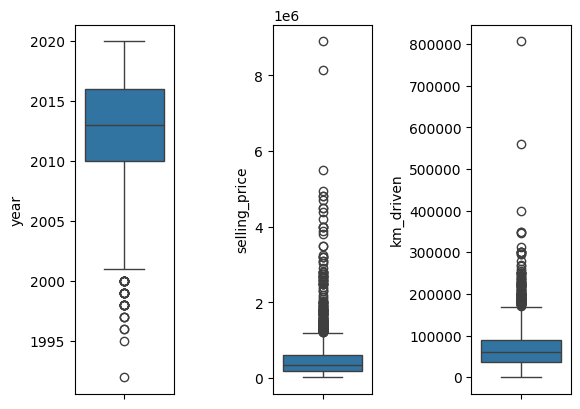

In [8]:
#plot box plot of numerical columns
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=0.5)
for i,c in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[c])
plt.show()

<Axes: xlabel='brand'>

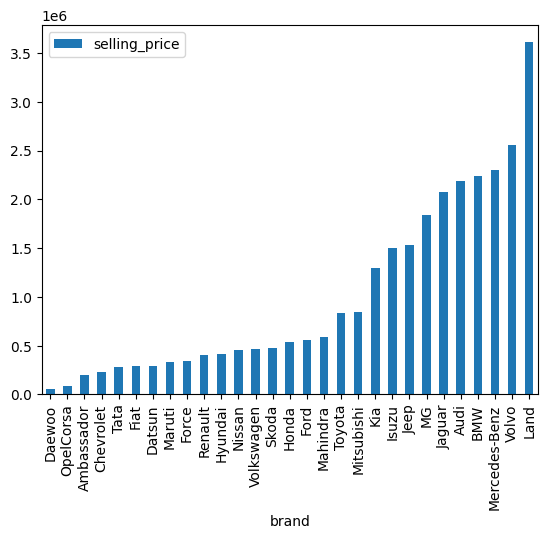

In [11]:
#Average price per brand
r=df.groupby('brand')[['selling_price']].mean()
r=r.sort_values('selling_price')
r.plot.bar()


<Axes: xlabel='brand'>

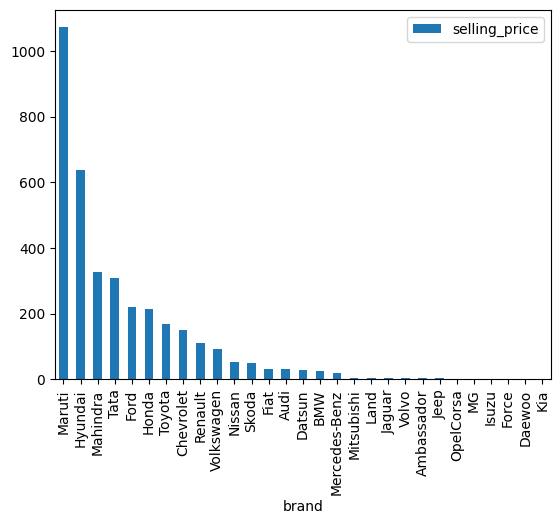

In [ ]:
#Count of cars for each brand sorted in descending order
r=df.groupby('brand')[['selling_price']].count()
r.sort_values('selling_price',inplace=True,ascending=False)
r.plot.bar()

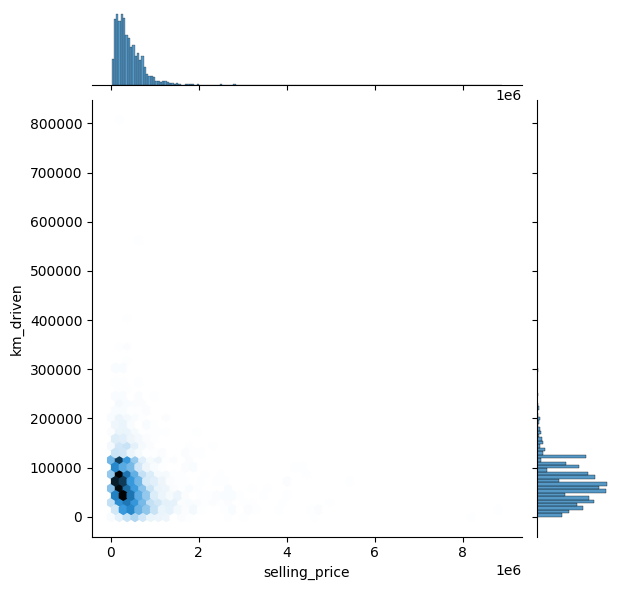

In [18]:
#Jointplot of selling price and km_driven
sns.jointplot(x=df['selling_price'],y=df['km_driven'],kind='hex')

In [19]:
df[df['selling_price'] < 100000].shape

(268, 9)

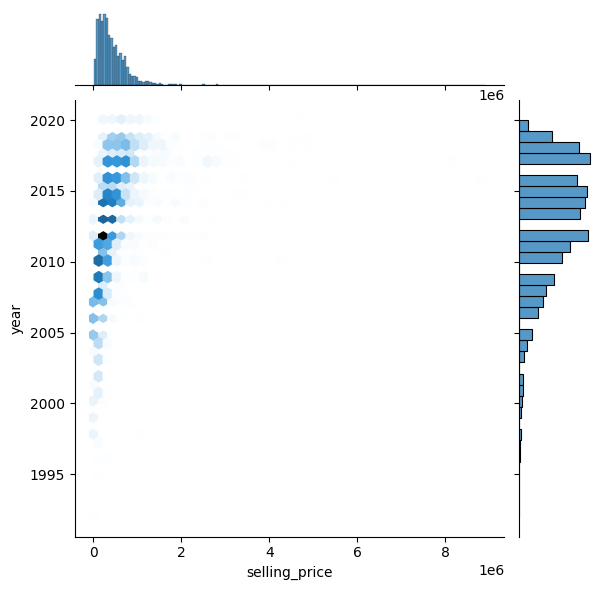

In [16]:
#Jointplot of selling price and year
sns.jointplot(x=df['selling_price'],y=df['year'],kind='hex')

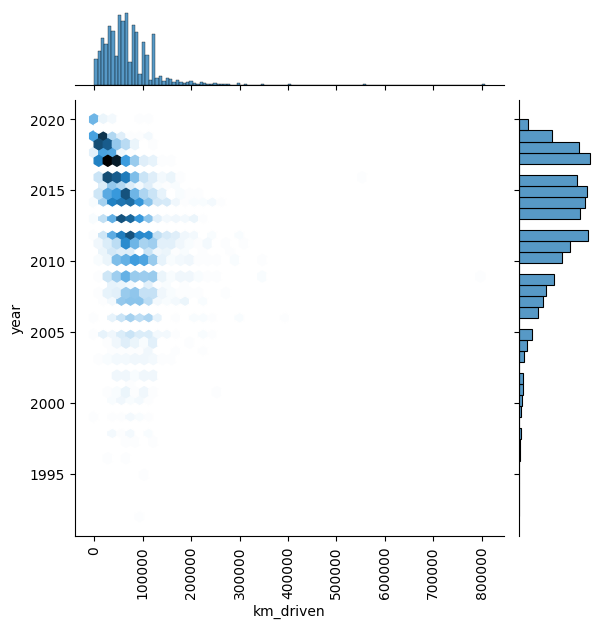

In [15]:
#Jointplot of km_driven vs year
sns.jointplot(x=df['km_driven'],y=df['year'],kind='hex')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='year'>

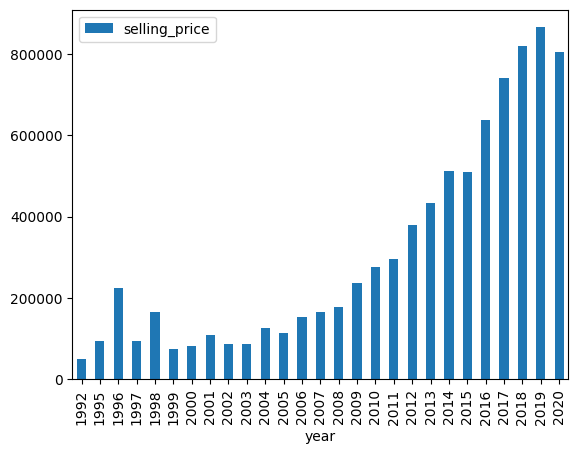

In [ ]:
#Plot year wise mean of selling price
r=df.groupby('year')[['selling_price']].mean()
r.plot.bar()

<Axes: xlabel='year'>

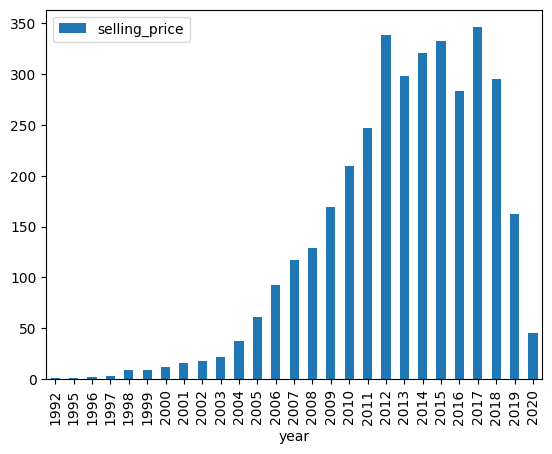

In [ ]:
#year wise count of cars for that year
r=df.groupby('year')[['selling_price']].count()
r.plot.bar()

In [ ]:
#Top n cars by sales count also display the sales count
n=10
r=df.groupby('name').agg(count=('selling_price','count'))
r=r.sort_values('count',ascending=False)
print(r.head(n))

                          count
name                           
Maruti Swift Dzire VDI       54
Maruti Alto 800 LXI          48
Maruti Alto LXi              42
Maruti Alto LX               30
Hyundai EON Era Plus         28
Maruti Swift VDI BSIV        28
Maruti Wagon R VXI BS IV     26
Maruti Swift VDI             23
Maruti Wagon R LXI Minor     21
Hyundai Santro Xing GLS      20


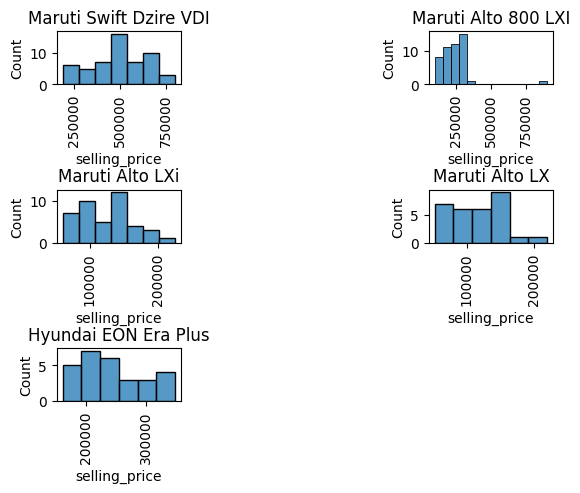

In [ ]:
#Histogram of selling_price of each of top n cars ordered by sales count
n=5
r=df.groupby('name').agg(count=('selling_price','count'))
r=r.sort_values('count',ascending=False)
r=r.head(n)

#print(r)
r=r.reset_index()
#print(r['name'])

t=r['name'].values
#print(t)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2.0, hspace=2.0)
for i,c in enumerate(t):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[df['name'] == c]['selling_price'])
    plt.xticks(rotation=90)
    plt.title(c)
    
plt.show()

<Axes: xlabel='transmission', ylabel='selling_price'>

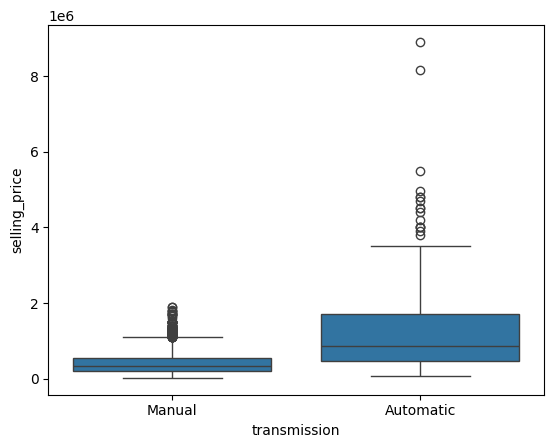

In [ ]:
#Boxplot of selling_price vs Transmission

sns.boxplot(x=df['transmission'],y=df['selling_price'])


<Axes: xlabel='fuel', ylabel='selling_price'>

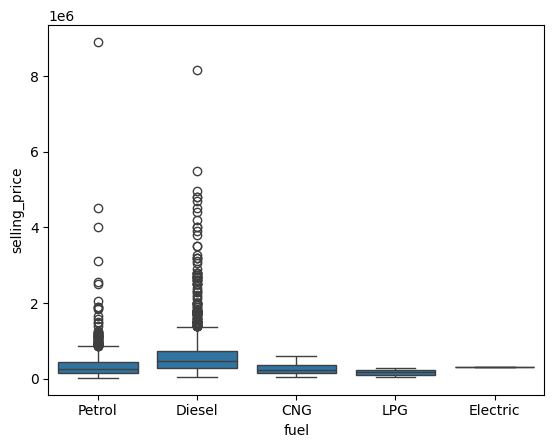

In [ ]:
#Boxplot of fuel vs selling price
sns.boxplot(x=df['fuel'],y=df['selling_price'])

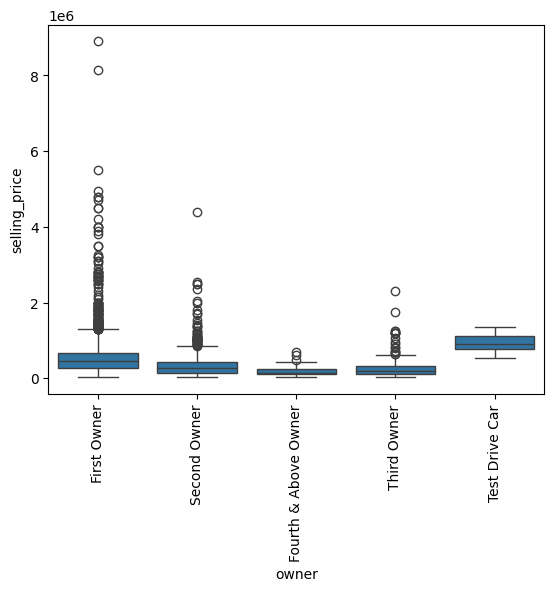

In [ ]:
#Boxplot of owner vs selling_price

sns.boxplot(x=df['owner'],y=df['selling_price'])
plt.xticks(rotation=90)
plt.show()

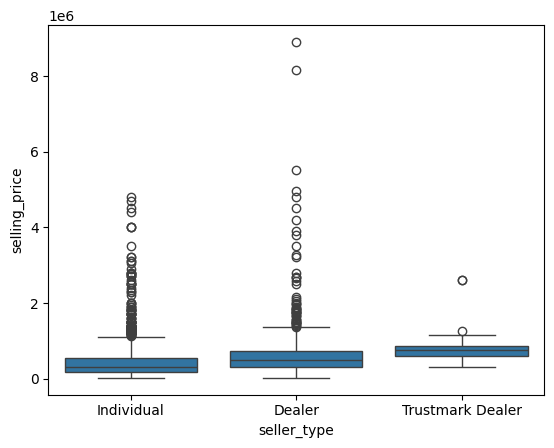

In [ ]:
#Boxplot of seller_type vs selling_price
sns.boxplot(x=df['seller_type'],y=df['selling_price'])
plt.show()

                       mean           std  count
brand                                           
Maruti         3.320312e+05  2.256106e+05   1072
Hyundai        4.133406e+05  2.800555e+05    637
Mahindra       5.847804e+05  3.542112e+05    328
Tata           2.786724e+05  2.681596e+05    308
Ford           5.636272e+05  4.950462e+05    220
Honda          5.399444e+05  2.810883e+05    216
Toyota         8.389176e+05  6.274955e+05    170
Chevrolet      2.327132e+05  1.404916e+05    151
Renault        4.084000e+05  1.573407e+05    110
Volkswagen     4.616666e+05  2.267509e+05     93
Nissan         4.570384e+05  2.383003e+05     52
Skoda          4.755510e+05  2.548712e+05     49
Fiat           2.870937e+05  1.794507e+05     32
Audi           2.185452e+06  1.590988e+06     31
Datsun         2.965517e+05  7.056027e+04     29
BMW            2.242800e+06  1.288606e+06     25
Mercedes-Benz  2.299238e+06  1.957887e+06     21
Mitsubishi     8.430000e+05  2.259591e+05      5
Land           3.609

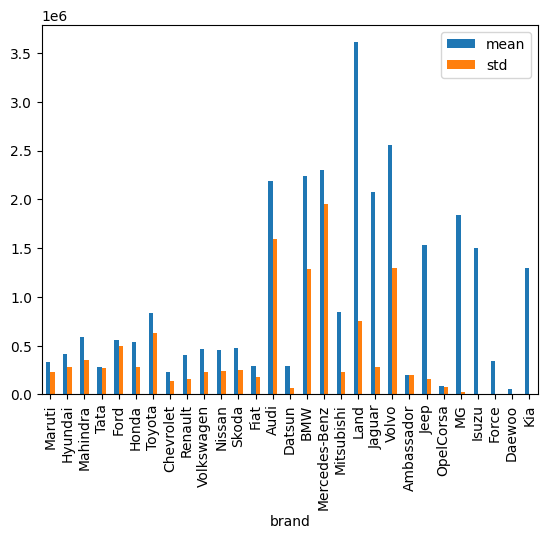

In [ ]:
#Mean and std of selling price of each brand ordered by brand with most cars first

r=df.groupby('brand').agg(mean=('selling_price','mean'),std=('selling_price','std'),count=('selling_price','count'))
r=r.fillna(0)
r=r.sort_values('count',ascending=False)
r[['mean','std']].plot.bar()
print(r)

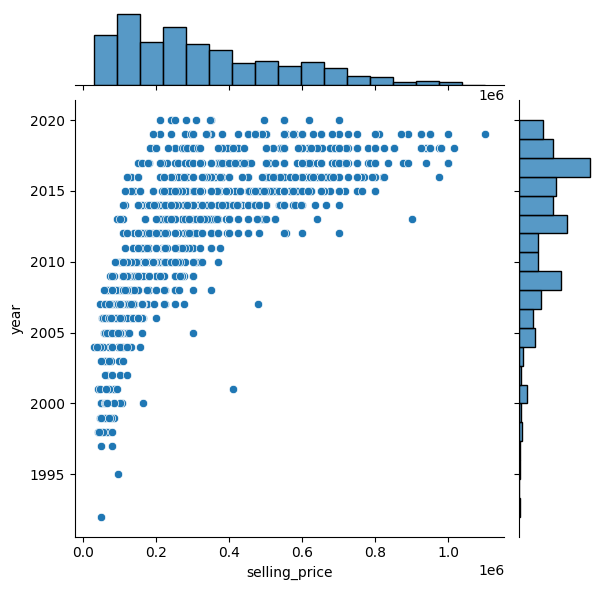

In [20]:
#Jointplot of selling price vs year for brand Maruti(which has more than 1000 cars)
r=df[df['brand'] == 'Maruti']
sns.jointplot(x=r['selling_price'],y=r['year'])
plt.show()


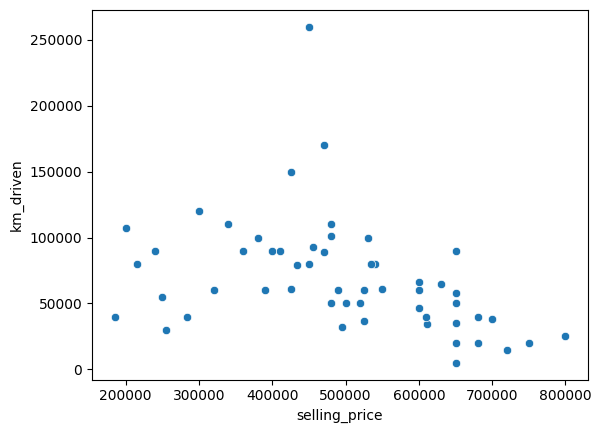

In [ ]:
#For particular car name scatterplot of selling price vs km_driven
r=df[df['name'] == 'Maruti Swift Dzire VDI']
sns.scatterplot(x=r['selling_price'],y=r['km_driven'])
plt.show()


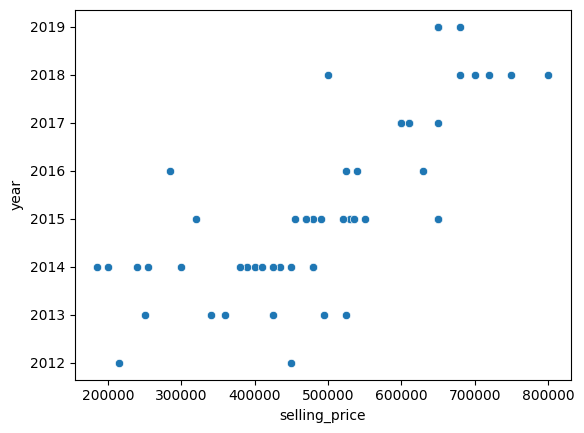

In [ ]:
#For particular car name scatter plot of selling price vs year
r=df[df['name'] == 'Maruti Swift Dzire VDI']
sns.scatterplot(x=r['selling_price'],y=r['year'])
plt.show()


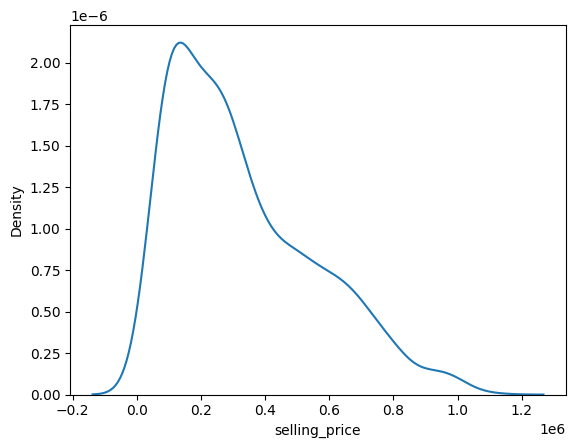

In [ ]:
#KDE Plot of selling price for brand Maruti(which has more than 1000 cars)
r=df[df['brand'] == 'Maruti']
sns.kdeplot(r['selling_price'])
plt.show()

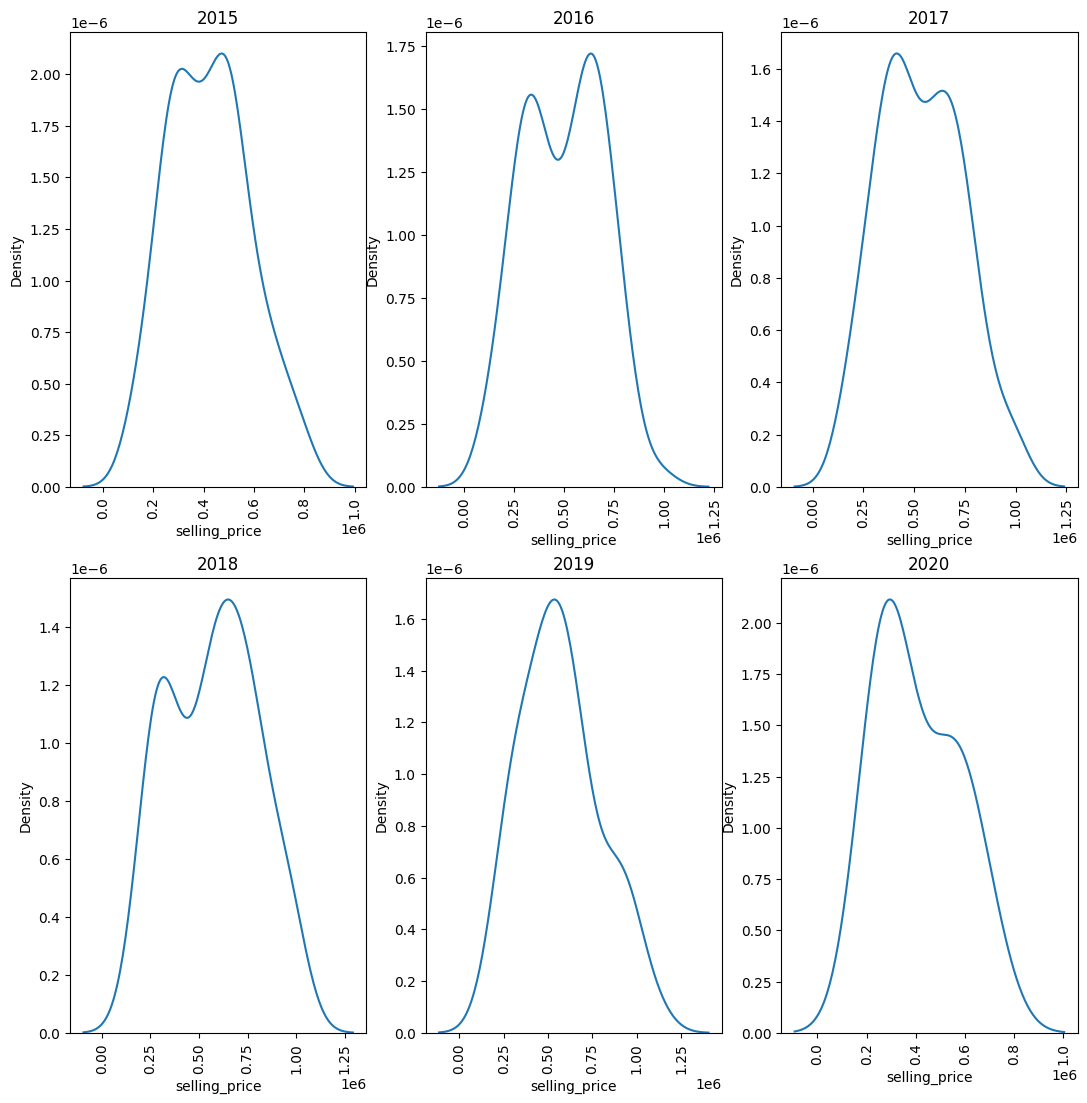

In [ ]:
#KDE Plot for different years for brand Maruti

plt.figure(figsize=(13,13))
for i,c in enumerate([2015,2016,2017,2018,2019,2020]):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[(df['brand'] == 'Maruti') & (df['year'] == c)]['selling_price'])
    plt.xticks(rotation=90)
    plt.title(c)
    
plt.show()

In [ ]:
#Find fuel type wise selling price where selling price is greater than average of that fuel type

for i in df['fuel'].unique():
    print(df[(df['fuel'] == i) & (df['selling_price'] > df[df['fuel'] == i]['selling_price'].mean())]) 



                                 name  year  selling_price  km_driven    fuel  \
6           Hyundai Xcent 1.2 Kappa S  2016         550000      25000  Petrol   
8            Hyundai Creta 1.6 VTVT S  2015         850000      25000  Petrol   
12    Toyota Corolla Altis 1.8 VL CVT  2018        1650000      25000  Petrol   
26               Maruti Ciaz VXi Plus  2015         585000      24000  Petrol   
33                    Honda City V MT  2018         930000      14500  Petrol   
...                               ...   ...            ...        ...     ...   
4206        Hyundai i20 Active 1.2 SX  2015         565000      46000  Petrol   
4224       Toyota Fortuner 2.7 2WD AT  2016        2500000      70000  Petrol   
4234     Mahindra KUV 100 G80 K4 Plus  2018         509999      15000  Petrol   
4278        Honda Amaze S Petrol BSIV  2020         614000       1000  Petrol   
4315               Maruti Celerio ZXI  2017         415000      20000  Petrol   

     seller_type transmissi

In [23]:
#Find seller type wise selling price where selling price is greater than average selling price for that seller type

for i in df['seller_type'].unique():
    r=df[(df['seller_type'] == i) & (df['selling_price'] > df[df['seller_type'] == i]['selling_price'].mean() )]
    print(r)

                                              name  year  selling_price  \
2                             Hyundai Verna 1.6 SX  2012         600000   
4                            Honda Amaze VX i-DTEC  2014         450000   
6                        Hyundai Xcent 1.2 Kappa S  2016         550000   
8                         Hyundai Creta 1.6 VTVT S  2015         850000   
34                      Tata Tigor 1.2 Revotron XT  2018         525000   
...                                            ...   ...            ...   
4322                 Hyundai Verna 1.6 SX CRDi (O)  2013         500000   
4331          Ford EcoSport 1.5 TDCi Titanium BSIV  2015         530000   
4332                  Mahindra Scorpio S2 7 Seater  2015         750000   
4334  Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV  2012         600000   
4338              Hyundai Creta 1.6 CRDi SX Option  2016         865000   

      km_driven    fuel seller_type transmission         owner     brand  
2        100000  Diesel 

In [36]:
#Find yearwise sum of selling price starting year 2006 and onwards. Find the percentage contribution for each 
# year.Find running sum and running #percentage.


r=df.groupby('year')['selling_price'].sum()
r=r[r.index >= 2006]
sum_total=r.sum()
print(r)
r_percent=(r/sum_total)*100
print(r_percent)

print(r.cumsum())
print(r_percent.cumsum())





year
2006     14338997
2007     19337999
2008     22919194
2009     39793994
2010     57872683
2011     73118988
2012    128220985
2013    129047793
2014    164624985
2015    169336985
2016    180650986
2017    256449985
2018    242023990
2019    140188995
2020     36217998
Name: selling_price, dtype: int64
year
2006     0.856497
2007     1.155097
2008     1.369009
2009     2.376975
2010     3.456851
2011     4.367543
2012     7.658896
2013     7.708283
2014     9.833379
2015    10.114837
2016    10.790644
2017    15.318270
2018    14.456577
2019     8.373769
2020     2.163373
Name: selling_price, dtype: float64
year
2006      14338997
2007      33676996
2008      56596190
2009      96390184
2010     154262867
2011     227381855
2012     355602840
2013     484650633
2014     649275618
2015     818612603
2016     999263589
2017    1255713574
2018    1497737564
2019    1637926559
2020    1674144557
Name: selling_price, dtype: int64
year
2006      0.856497
2007      2.011594
2008      3.3

In [38]:
#Extend q3 by computing yoy percentage change in sum of sales
print(r_percent.diff())

year
2006         NaN
2007    0.298600
2008    0.213912
2009    1.007966
2010    1.079876
2011    0.910692
2012    3.291352
2013    0.049387
2014    2.125097
2015    0.281457
2016    0.675808
2017    4.527626
2018   -0.861694
2019   -6.082808
2020   -6.210395
Name: selling_price, dtype: float64
